# Using EvalML : An automated Machine Learning tool

In [2]:
import evalml
from evalml import AutoMLSearch

In [3]:
from evalml.preprocessing import *
X, y = load_data("CarPrice_assignment.csv",index=None,target="price")

             Number of Features
Categorical                  10
Numeric                      15

Number of training examples: 205
Targets
8921.0     0.98%
9279.0     0.98%
7898.0     0.98%
8916.5     0.98%
7775.0     0.98%
           ...  
45400.0    0.49%
16503.0    0.49%
5389.0     0.49%
6189.0     0.49%
22625.0    0.49%
Name: price, Length: 189, dtype: object


In [4]:
X_train,X_test,y_train,y_test = split_data(X,y,problem_type="regression")
X_train

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18
134,135,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,...,four,121,mpfi,2.54,2.07,9.3,110,5250,21,28
145,146,0,subaru r2,gas,turbo,four,sedan,4wd,front,97.0,...,four,108,mpfi,3.62,2.64,7.7,111,4800,24,29
122,123,1,plymouth fury gran sedan,gas,std,four,sedan,fwd,front,93.7,...,four,98,2bbl,2.97,3.23,9.4,68,5500,31,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,...,five,183,idi,3.58,3.64,21.5,123,4350,22,25
192,193,0,volkswagen rabbit custom,diesel,turbo,four,sedan,fwd,front,100.4,...,four,97,idi,3.01,3.40,23.0,68,4500,33,38
117,118,0,peugeot 604sl,gas,turbo,four,sedan,rwd,front,108.0,...,four,134,mpfi,3.61,3.21,7.0,142,5600,18,24
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19


In [5]:
automl = AutoMLSearch(X_train=X_train,y_train=y_train,problem_type="regression",y_holdout=y_test,X_holdout=X_test,n_jobs=-1,holdout_set_size=0.25
                      ,run_feature_selection=True,max_iterations=50)
automl.search()

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.827e+08, tolerance: 7.301e+05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.533e+08, tolerance: 6.475e+05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.384e+08, tolerance: 5.905e+05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.806e+08, tolerance: 9.845e+05


{1: {'Random Forest Regressor w/ Drop Columns Transformer + Imputer + One Hot Encoder + RF Regressor Select From Model': 2.202134132385254,
  'Total time of batch': 2.3498847484588623},
 2: {'Extra Trees Regressor w/ Select Columns By Type Transformer + Drop Columns Transformer + Imputer + Select Columns Transformer + Select Columns Transformer + Imputer + One Hot Encoder': 1.2720162868499756,
  'Elastic Net Regressor w/ Select Columns By Type Transformer + Drop Columns Transformer + Imputer + Standard Scaler + Select Columns Transformer + Select Columns Transformer + Imputer + One Hot Encoder + Standard Scaler': 1.213517427444458,
  'Total time of batch': 2.928788185119629},
 3: {'Random Forest Regressor w/ Select Columns By Type Transformer + Drop Columns Transformer + Imputer + Select Columns Transformer + Select Columns Transformer + Imputer + One Hot Encoder': 5.184847593307495,
  'Extra Trees Regressor w/ Select Columns By Type Transformer + Drop Columns Transformer + Imputer + S

In [7]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,holdout_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,35,Extra Trees Regressor w/ Select Columns By Typ...,35,0.908940,0.908940,0.909468,0.015575,20966.453785,False,{'Numeric Pipeline - Select Columns By Type Tr...
4,1,Random Forest Regressor w/ Drop Columns Transf...,1,0.903958,0.903958,0.925134,0.020040,21325.905935,False,{'Drop Columns Transformer': {'columns': ['Car...
7,22,Random Forest Regressor w/ Select Columns By T...,22,0.901724,0.901724,0.922354,0.023471,21262.113639,False,{'Numeric Pipeline - Select Columns By Type Tr...
28,45,Elastic Net Regressor w/ Select Columns By Typ...,45,0.863120,0.863120,0.840584,0.061145,19386.003689,False,{'Numeric Pipeline - Select Columns By Type Tr...
49,0,Mean Baseline Regression Pipeline,0,-0.000255,-0.000255,-0.004359,0.004214,0.000000,False,{'Baseline Regressor': {'strategy': 'mean'}}


In [12]:
automl.describe_pipeline(45)


******************************************************************************************************************************************************************************************************************************
* Elastic Net Regressor w/ Select Columns By Type Transformer + Drop Columns Transformer + Imputer + Standard Scaler + Select Columns Transformer + Select Columns Transformer + Imputer + One Hot Encoder + Standard Scaler *
******************************************************************************************************************************************************************************************************************************

Problem Type: regression
Model Family: Linear

Pipeline Steps
1. Select Columns By Type Transformer
	 * column_types : ['category', 'EmailAddress', 'URL']
	 * exclude : True
2. Drop Columns Transformer
	 * columns : ['CarName']
3. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : median
	 * b

In [13]:
pipeline = automl.get_pipeline(45)
pipeline.fit(X_train,y_train)
score=pipeline.score(X_test, y_test, ["r2",'mae'])

In [14]:
print("Elastic net regression R2 score :",score["R2"])
print("Elastic net regression MAE :",score["MAE"])

Elastic net regression R2 score : 0.863119596644879
Elastic net regression MAE : 2380.3121837629415


# Which is little bit more than manual training

Mean Absolute Error: 2380.3121837629415
R-squared: 0.863119596644879


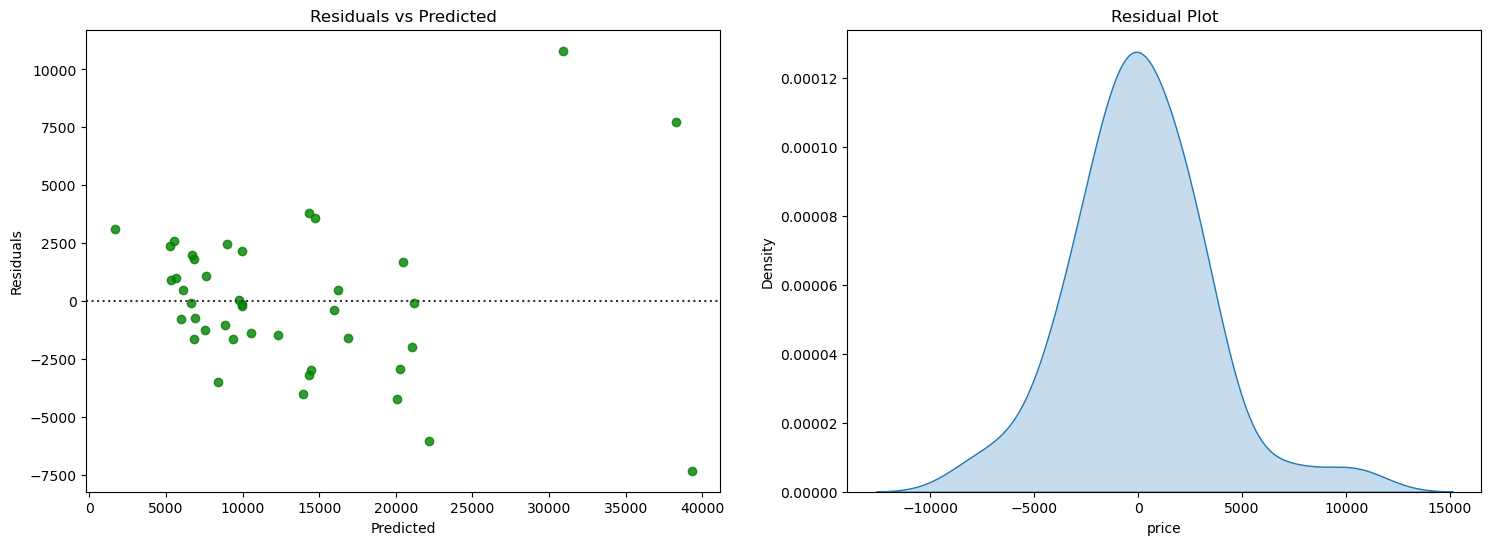

In [15]:
from sklearn.metrics import mean_absolute_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt
predictions=pipeline.predict(X_test)

residuals = y_test - predictions
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plotting residuals
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(18, 6))

# Residuals vs Predicted
sns.residplot(x=predictions, y=residuals, color='g', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted')

# KDE plot of residuals
sns.kdeplot(residuals, ax=ax2, fill=True)
ax2.set_title("Residual Plot")

plt.show()

Fitted well enough with Homoscedasticity and roughly normal residuals

By handling the outliers the outliers could increase the metrics significantly

In [26]:
import numpy as np
np.abs(residuals).sort_values(ascending=False)[:4]

16     10416.045730
129     7903.161732
74      7142.685149
179     6178.511041
Name: price, dtype: float64

In [28]:
X_test=X_test.drop(np.abs(residuals).sort_values(ascending=False)[:4].index)
y_test=y_test.drop(np.abs(residuals).sort_values(ascending=False)[:4].index)

Mean Absolute Error: 1782.4971859998773
R-squared: 0.7880762775941892


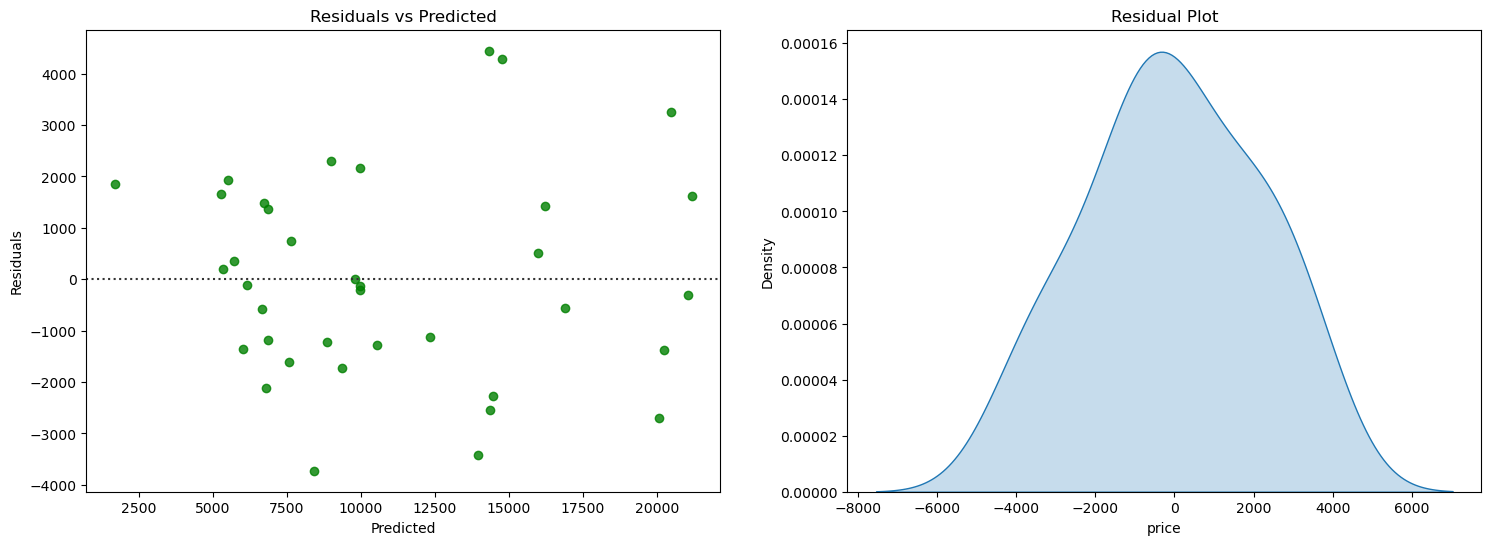

In [29]:
from sklearn.metrics import mean_absolute_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt
predictions=pipeline.predict(X_test)

residuals = y_test - predictions
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plotting residuals
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(18, 6))

# Residuals vs Predicted
sns.residplot(x=predictions, y=residuals, color='g', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted')

# KDE plot of residuals
sns.kdeplot(residuals, ax=ax2, fill=True)
ax2.set_title("Residual Plot")

plt.show()

# good range of residuals with less absolute error,but residuals deviating from normal distribution little bit